# 21회 기출문제

## 1. 머신 러닝 (50점)
학생 성적에 관한 데이터세트 제공 394행짜리 소규모 데이터.

1-1. 시각화 포함 탐색적 자료분석(EDA) <br>
1-2. 결측치 식별하고 결측치를 예측하는 두 가지 방법 정도를 쓰고, 선택한 이유를 설명.<br>
1-3. 범주형 변수 인코딩이 필요한 경우를 식별하고, 변환을 적용하시오. 선택한 이유를 설명.<br>
 독립변수가 범주형 변수인 경우 연속형 변환필요 <br>


## 1-1. 시각화 포함 탐색적 자료분석(EDA) 

In [7]:
import pandas as pd
df = pd.read_csv('data/student_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      395 non-null    object 
 1   sex         395 non-null    object 
 2   paid        395 non-null    object 
 3   activities  395 non-null    object 
 4   famrel      394 non-null    float64
 5   freetime    393 non-null    float64
 6   goout       392 non-null    float64
 7   Dalc        391 non-null    float64
 8   Walc        393 non-null    float64
 9   health      391 non-null    float64
 10  absences    392 non-null    float64
 11  grade       395 non-null    int64  
dtypes: float64(7), int64(1), object(4)
memory usage: 37.2+ KB


#### 1-1-1) 데이터 타입 설명
##### > 독립변수는 object, float 형태이며, 종속변수는 int형이다. object 타입을 인코딩을 통하여 변환해줄 필요가 있어 보인다.

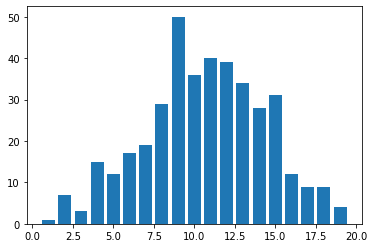

In [8]:
import matplotlib.pyplot as plt
df_grade = df['grade'].value_counts().sort_index()
plt.bar(df_grade.index, df_grade.values)
plt.show()

In [9]:
import scipy.stats as stats
stats.shapiro(df['grade'])

ShapiroResult(statistic=0.9871256351470947, pvalue=0.0014306077500805259)

#### 1-1-2) 종속변수 분포 설명
##### > 종속변수 학생 성적에 대한 분포를 확인한 결과 평균 근처에 관측치가 많은 정규분포 형태를 띄었다.
##### > 종속변수가 정규분포를 띄고, 다양한 값이 있으므로 다중 classification으로 예측하는 것 보다는 회귀분석을 진행하는 것이 좋을 것으로 판단된다.

<AxesSubplot:>

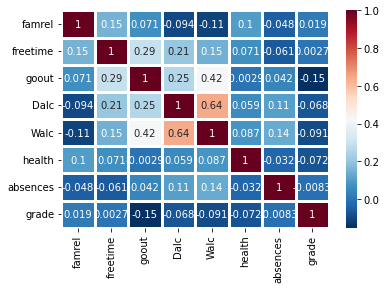

In [10]:
# 1-1-2) 변수탐색 - 상관관계
import seaborn as sns
df_corr = df.corr(method = 'pearson')
sns.heatmap(df_corr, xticklabels = df_corr.columns, yticklabels = df_corr.columns, cmap = 'RdBu_r'
            ,  annot = True, linewidth = 3)

#### 1-1-3) 독립변수 간 상관관계
##### > 독립변수끼리 상관관계를 확인해본 결과 다중공선성을 걱정할 만큼(0.9 이상)의 큰 상관관계를 보이는 변수는 보이지 않는다.
#### 1-1-4) 독립변수와 종속변수의 상관관계 설명
##### > 종속변수 grade(학생성적)와의 상관계수를 확인해 보았을 때, 수치형 변수에서는 큰 상관성이 없었다. 파생변수를 활용할 필요가 있어 보인다.

<BarContainer object of 2 artists>

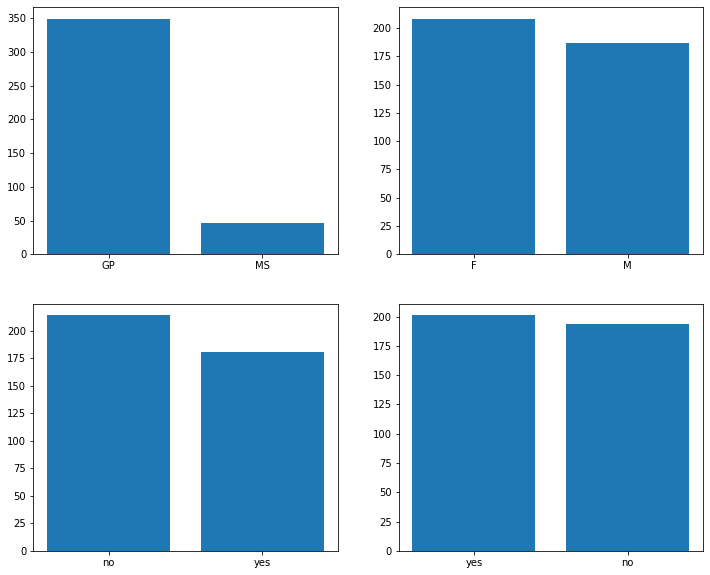

In [11]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,2, figsize = (12,10))

axs[0][0].bar(df['school'].value_counts().index, df['school'].value_counts().values)
axs[0][1].bar(df['sex'].value_counts().index, df['sex'].value_counts().values)
axs[1][0].bar(df['paid'].value_counts().index, df['paid'].value_counts().values)
axs[1][1].bar(df['activities'].value_counts().index, df['activities'].value_counts().values)

#### 1-1-5) 범주형 변수 설명
##### > 독립변수 school의 경우 비대칭성이 있으므로 주의해야 한다.

<AxesSubplot:>

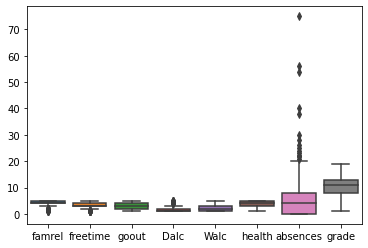

In [12]:
import seaborn as sns
sns.boxplot(data = df)

#### 1-1-6) 이상치 변수 설명
##### > seaborn의 boxplot을 통해 이상치를 탐색했을 때 absences 변수만 이상치를 가지고 있음을 확인할 수 있다.
##### > 추후 머신러닝 모델 적합 시, 이상치에 민감한 모델이라면 absences 변수의 이상치 처리가 필요하다.

In [13]:
'''
df_missing_index = pd.DataFrame(df.isnull().sum().index)
df_missing_values = pd.DataFrame(df.isnull().sum().index)
df_missing = pd.concat(df_missing_index, df_missing_values)
df_missing.columns = ['var', 'missing_count']
df_missing
'''
df.isnull().sum()

school        0
sex           0
paid          0
activities    0
famrel        1
freetime      2
goout         3
Dalc          4
Walc          2
health        4
absences      3
grade         0
dtype: int64

#### 1-1-7) 결측치 변수 설명
##### > 결측치 탐색을 했을 때 'famrel', 'freetime', 'goout ', 'Dalc', 'Walc', 'health', 'absences' 변수에 결측치를 확인할 수 있다.
##### > 결측치의 개수는 전체 데이터의 1%도 되지 않는 19개이다. 
##### > 결측치가 존재하는 변수들은 float64형태로 평균으로 대체하거나 KNN을 사용할 수 있을 것으로 보인다.

### 1-1) 총정리
#### 1-1-1) 데이터 타입 설명
##### > 독립변수는 object, float 형태이며, 종속변수는 int형이다. object 타입을 인코딩을 통하여 변환해줄 필요가 있어 보인다.

#### 1-1-2) 종속변수 분포 설명
##### > 종속변수 학생 성적에 대한 분포를 확인한 결과 평균 근처에 관측치가 많은 정규분포 형태를 띄었다.
##### > 종속변수가 정규분포를 띄고, 다양한 값이 있으므로 다중 classification으로 예측하는 것 보다는 회귀분석을 진행하는 것이 좋을 것으로 판단된다.

#### 1-1-3) 독립변수 간 상관관계
##### > 독립변수끼리 상관관계를 확인해본 결과 다중공선성을 걱정할 만큼(0.9 이상)의 큰 상관관계를 보이는 변수는 보이지 않는다.
#### 1-1-4) 독립변수와 종속변수의 상관관계 설명
##### > 종속변수 grade(학생성적)와의 상관계수를 확인해 보았을 때, 수치형 변수에서는 큰 상관성이 없었다. 파생변수를 활용할 필요가 있어 보인다.

#### 1-1-5) 범주형 변수 설명
##### > 독립변수 school의 경우 비대칭성이 있으므로 주의해야 한다.

#### 1-1-6) 이상치 변수 설명
##### > seaborn의 boxplot을 통해 이상치를 탐색했을 때 absences 변수만 이상치를 가지고 있음을 확인할 수 있다.
##### > 추후 머신러닝 모델 적합 시, 이상치에 민감한 모델이라면 absences 변수의 이상치 처리가 필요하다.

#### 1-1-7) 결측치 변수 설명
##### > 결측치 탐색을 했을 때 'famrel', 'freetime', 'goout ', 'Dalc', 'Walc', 'health', 'absences' 변수에 결측치를 확인할 수 있다.
##### > 결측치의 개수는 전체 데이터의 1%도 되지 않는 19개이다. 
##### > 결측치가 존재하는 변수들은 float64형태로 평균으로 대체하거나 KNN을 사용할 수 있을 것으로 보인다.

## 1-2. 결측치 식별하고 결측치를 예측하는 두 가지 방법 정도를 쓰고, 선택한 이유를 설명.<br>

In [14]:
from sklearn.impute import KNNImputer
print('결측치 대치 전')
print(df.isnull().sum(), '\n')
print('결측치가 있는 행 추출')
print(df[df.isnull().any(axis = 1)], '\n')
# 결측치가 있는 수치형 데이터만 추출
df_missing = df[['famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences' ]]
knnImputer = KNNImputer(n_neighbors = 5)
df_knnImputer = knnImputer.fit_transform(df_missing)
df[df_missing.columns] = pd.DataFrame(df_knnImputer, columns = df_missing.columns)
print('결측치 대치 후')
df.isnull().sum()

결측치 대치 전
school        0
sex           0
paid          0
activities    0
famrel        1
freetime      2
goout         3
Dalc          4
Walc          2
health        4
absences      3
grade         0
dtype: int64 

결측치가 있는 행 추출
    school sex paid activities  famrel  freetime  goout  Dalc  Walc  health  \
9       GP   M  yes        yes     5.0       5.0    NaN   1.0   1.0     5.0   
14      GP   M   no         no     NaN       5.0    2.0   1.0   1.0     3.0   
15      GP   F   no         no     4.0       4.0    4.0   1.0   2.0     2.0   
25      GP   F  yes         no     1.0       2.0    2.0   1.0   NaN     5.0   
39      GP   F  yes        yes     4.0       3.0    1.0   1.0   1.0     NaN   
40      GP   F   no        yes     3.0       3.0    NaN   1.0   2.0     3.0   
49      GP   F   no        yes     4.0       4.0    4.0   1.0   1.0     NaN   
61      GP   F   no        yes     5.0       5.0    5.0   NaN   5.0     5.0   
71      GP   M   no         no     3.0       3.0    3.0   Na

school        0
sex           0
paid          0
activities    0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
grade         0
dtype: int64

#### 결측치를 예측하는 방법에는 단순대치법과, K-NN을 이용한 결측치 대체 방법이 있다.
#### 단순대치법은 수치형 변수의 경우 각 컬럼의 평균이나 중앙값으로 사용하여 결측치를 보간할 수 있으며
#### 명목형/범주형 변수의 경우 최빈값을 사용하여 대치할 수 있다.
#### K-NN을 이용한 결측치 대체 방법은 보간법 중 결측치가 없는 컬럼들의 최근접 이웃 알고리즘을 통해 결측치가 있는 변수 대체를 할 수있다.
#### K-NN을 이용할 때는 거리 계산이 가능한 수치형 변수만 사용 가능하다.
#### 해당 데이터에서는 한 행이 모두 결측치인 경우는 존재하지 않으므로 삭제보다는 대치로 진행하겠다.
#### 수치형 변수만 결측치가 있으므로 K-NN기법을 사용하여 대치하였다.

In [65]:
'''
df['famrel'].fillna(df['famrel'].mean(), inplace = True)
df['freetime'].fillna(df['freetime'].mean(), inplace = True)
df['goout'].fillna(df['goout'].mean(), inplace = True)
df['Dalc'].fillna(df['Dalc'].mean(), inplace = True)
df['Walc'].fillna(df['Walc'].mean(), inplace = True)
df['health'].fillna(df['health'].mean(), inplace = True)
df['absences'].fillna(df['absences'].mean(), inplace = True)
'''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      395 non-null    object 
 1   sex         395 non-null    object 
 2   paid        395 non-null    object 
 3   activities  395 non-null    object 
 4   famrel      395 non-null    float64
 5   freetime    395 non-null    float64
 6   goout       395 non-null    float64
 7   Dalc        395 non-null    float64
 8   Walc        395 non-null    float64
 9   health      395 non-null    float64
 10  absences    395 non-null    float64
 11  grade       395 non-null    int64  
dtypes: float64(7), int64(1), object(4)
memory usage: 37.2+ KB


## 1-3. 범주형 변수 인코딩이 필요한 경우를 식별하고, 변환을 적용하시오. 선택한 이유를 설명.<br>


In [15]:
df = pd.get_dummies(df, columns = ['school', 'sex', 'paid', 'activities'], drop_first =  True)
df

,famrel,freetime,goout,Dalc,Walc,health,absences,grade,school_MS,sex_M,paid_yes,activities_yes
0,4.0,3.0,4.0,1.0,1.0,3.0,6.0,6,0,0,0,0
1,5.0,3.0,3.0,1.0,1.0,3.0,4.0,5,0,0,0,0
2,4.0,3.0,2.0,2.0,3.0,3.0,10.0,8,0,0,1,0
3,3.0,2.0,2.0,1.0,1.0,5.0,2.0,15,0,0,1,1
4,4.0,3.0,2.0,1.0,2.0,5.0,4.0,9,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
390,5.0,5.0,4.0,4.0,5.0,4.0,11.0,9,1,1,1,0
391,2.0,4.0,5.0,3.0,4.0,2.0,3.0,15,1,1,0,0
392,5.0,5.0,3.0,3.0,3.0,3.0,3.0,8,1,1,0,0
393,4.0,4.0,1.0,3.0,4.0,5.0,0.0,11,1,1,0,0


#### 이산형 변수  school, sex, paid, activities가 존재하며
#### 이산형 변수 이므로 boolean 타입으로 변경하여 KNN을 이용한 결측치 처리와 머신러닝에서 변수로 사용가능하도록 변환하였다.
#### 나머지 변수들은 수치나 순위형 변수로 판단되므로 원-핫-인코딩을 진행하지 않았다.

## 1.4. 데이터 분할 방법을 2가지 쓰고 적절한 데이터 분할을 적용. 선택한 이유 설명.

In [16]:
X = df.drop(['grade'], axis = 1)
y = df['grade']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2022)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(276, 11)
(276,)
(119, 11)
(119,)


#### 랜덤 분할 
##### > train test데이터셋을 나누어서 학습된 데이터를 검증할 수 있음 
##### > 분할 시에 무작위로 사용자가 지정하여 비율로 분할 함 
##### > 전체 분석 데이터 중 머신러닝 모델을 학습시키기 위한 학습용 데이터와 테스트 데이터를 나누어서 적용시키는 이유는 
##### > 모델 결과가 다른 데이터에도 적용 가능한지, 일반화가 가능한지를 검증하기 위함이다. 
 
#### 층화 추출 기법 
##### > 종속변수의 클래스의 비율이 학습용 데이터와 테스트용 데이터에 비율이 같게 분할함 
##### > 클래스의 편향을 막을 수 있음 
##### > 종속변수가 범주형 변수인 분류분석에 사용 

#### 해당 데이터는 종속변수가 연속형이므로, 회귀분석을 사용한다.
#### 그러므로 층화추출기법을 사용한 분할이 아닌 랜덤 샘플링을 통한 분할을 사용하여, 7:3 비율로 분할하였다. 

## 1.5. svm, xgboost, randomforest 3개의 알고리즘 공통점을 쓰고 이 예측 분석에 적합한 알고리즘인지 설명.
#### 회귀분석과 분류분석을 모두 할 수 있는 분석알고리즘이다. 
#### 모두 범주형 변수를 독립변수로 사용할 수 없어 변환을 해주어야 한다. 
#### 과대 적합 과소적합을 막기위한 매개변수의 설정이 필요하다.
#### 회귀분석에서 다중공선성의 문제를 해결할 수 있다.

#### 해당 데이터에서는 종속변수의 값이 연속형이므로 회귀분석이 적합하다. 
#### 회귀분석에서 다중공선서의 문제를 해결하는 것이 중요한데 
#### SVM은 커널트릭을통해 xgboost와 radomforest는 트리모델을 통해 다중공선성을 해결할 수 있다. 
#### 그러므로 회귀분석을 지원하는 위 3가지 알고리즘은 연속형 변수를 예측하기에 적합하다.

## 1.6. 세 가지 모델 모두 모델링 해보고 가장 적합한 알고리즘 선택하고 이유 설명. 한계점 설명하고 보완 가능한 부분 설명. 현업에서 사용시 주의할 점 등에 대해 기술.

In [126]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

svr = SVR()
param_grid = {'C' : [0.1,1,10,100], 'gamma' : [0.001, 0.01, 0.1, 1, 10]}
model = GridSearchCV(svr, param_grid, cv = 5)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

print('SVR_best_estimator_ : ', model.best_estimator_)
best_estimator_result = pd.DataFrame(model.cv_results_['params'])
best_estimator_result['mean_test_score'] = model.cv_results_['mean_test_score']
best_estimator_result = best_estimator_result.sort_values(['mean_test_score'], ascending = False)
print(best_estimator_result)

print('---------------------')
print('SVC_scaled_train_score : ', model.score(X_train_scaled, y_train))
print('SVC_scaled_test_score : ', model.score(X_test_scaled, y_test))
print('SVC_scaled_RMSE : ', np.sqrt(mean_squared_error(y_test, y_pred)))



SVR_best_estimator_ :  SVR(C=1, gamma=0.1)
        C   gamma  mean_test_score
7     1.0   0.100         0.040298
18  100.0   1.000         0.009576
13   10.0   1.000         0.007297
6     1.0   0.010         0.005559
2     0.1   0.100         0.000452
10   10.0   0.001        -0.001228
8     1.0   1.000        -0.003215
11   10.0   0.010        -0.005246
15  100.0   0.001        -0.014856
5     1.0   0.001        -0.017116
1     0.1   0.010        -0.017610
3     0.1   1.000        -0.023823
4     0.1  10.000        -0.026657
0     0.1   0.001        -0.026757
9     1.0  10.000        -0.032660
14   10.0  10.000        -0.058902
19  100.0  10.000        -0.058902
16  100.0   0.010        -0.158449
12   10.0   0.100        -0.163584
17  100.0   0.100        -0.629170
---------------------
SVC_scaled_train_score :  0.23492238422484146
SVC_scaled_test_score :  -0.08497940752796151
SVC_scaled_RMSE :  3.913445773063789


RandomForest_get_params :  {'cv': None, 'error_score': nan, 'estimator__bootstrap': True, 'estimator__ccp_alpha': 0.0, 'estimator__criterion': 'squared_error', 'estimator__max_depth': None, 'estimator__max_features': 'auto', 'estimator__max_leaf_nodes': None, 'estimator__max_samples': None, 'estimator__min_impurity_decrease': 0.0, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'estimator__min_weight_fraction_leaf': 0.0, 'estimator__n_estimators': 100, 'estimator__n_jobs': None, 'estimator__oob_score': True, 'estimator__random_state': None, 'estimator__verbose': 0, 'estimator__warm_start': False, 'estimator': RandomForestRegressor(oob_score=True), 'n_jobs': None, 'param_grid': {'max_depth': [2, 4, 6, 8, 10], 'min_samples_split': [2, 4, 6, 8, 10]}, 'pre_dispatch': '2*n_jobs', 'refit': True, 'return_train_score': False, 'scoring': None, 'verbose': 0}
RandomForest_best_estimator :  RandomForestRegressor(max_depth=2, min_samples_split=10, oob_score=True)
RandomForest_b

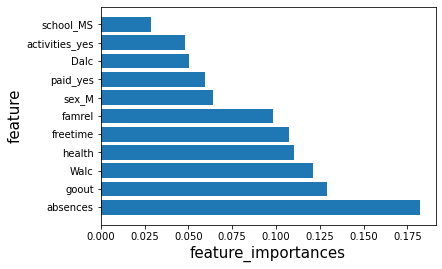

In [129]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

randomForestRegressor = RandomForestRegressor(oob_score = True)
#param_grid = {'n_estimators' : range(10,100,10),'max_depth' : [2,4,6,8,10], 'min_samples_split' : [2,4,6,8,10]}
param_grid = {'max_depth' : [2,4,6,8,10], 'min_samples_split' : [2,4,6,8,10]}
randomForestRegressor = GridSearchCV(randomForestRegressor, param_grid)
randomForestRegressor = randomForestRegressor.fit(X_train, y_train)

print('RandomForest_get_params : ', randomForestRegressor.get_params())
print('RandomForest_best_estimator : ', randomForestRegressor.best_estimator_)
print('RandomForest_best_estimator_.n_estimators : ', randomForestRegressor.best_estimator_.n_estimators)

model = RandomForestRegressor(oob_score = True
                              , n_estimators = randomForestRegressor.best_estimator_.n_estimators)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

print('RandomForest_train_score : ', model.score(X_train, y_train))
print('RandomForest_test_score : ', model.score(X_test, y_test))
print(f'RandomForest_oob_score : {model.oob_score_}')
print('RandomForest_RMSE : ', np.sqrt(mean_squared_error(y_test, y_pred)))

print('RandomForest_feature_importance')
feature_importances = pd.DataFrame(np.mean([tree.feature_importances_ 
                                            for tree in model.estimators_], axis = 0))
feature_importances = pd.concat([pd.DataFrame(X.columns), feature_importances], axis = 1)
feature_importances.columns = ['var_name', 'var_value']
feature_importances = feature_importances.sort_values(['var_value']
                                                      , ascending = False).reset_index(drop = True)

import matplotlib.pyplot as plt
plt.barh(feature_importances['var_name'], feature_importances['var_value'], align = 'center')
plt.xlabel('feature_importances', size = 15)
plt.ylabel('feature', size = 15)
plt.show()
    

XGB_get_params :  {'cv': 5, 'error_score': nan, 'estimator__objective': 'reg:squarederror', 'estimator__base_score': None, 'estimator__booster': None, 'estimator__callbacks': None, 'estimator__colsample_bylevel': None, 'estimator__colsample_bynode': None, 'estimator__colsample_bytree': None, 'estimator__early_stopping_rounds': None, 'estimator__enable_categorical': False, 'estimator__eval_metric': None, 'estimator__feature_types': None, 'estimator__gamma': None, 'estimator__gpu_id': None, 'estimator__grow_policy': None, 'estimator__importance_type': None, 'estimator__interaction_constraints': None, 'estimator__learning_rate': None, 'estimator__max_bin': None, 'estimator__max_cat_threshold': None, 'estimator__max_cat_to_onehot': None, 'estimator__max_delta_step': None, 'estimator__max_depth': None, 'estimator__max_leaves': None, 'estimator__min_child_weight': None, 'estimator__missing': nan, 'estimator__monotone_constraints': None, 'estimator__n_estimators': 1000, 'estimator__n_jobs': N

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

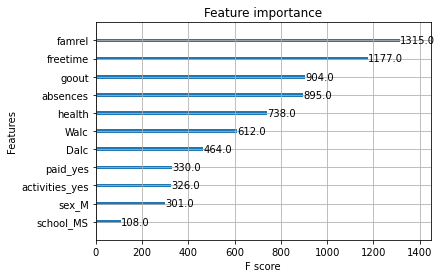

In [29]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor, plot_importance
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = X.columns)


xgbRegressor = XGBRegressor(n_estimators = 1000)
param_grid = {'max_depth' : [2,4,6,8,10]}
model = GridSearchCV(xgbRegressor, param_grid, cv = 5)
model.fit(X_train_scaled,y_train)

xgbRegressor = XGBRegressor(n_estimators = 1000, max_depth = 10)
xgbRegressor.fit(X_train_scaled,y_train)
y_pred = xgbRegressor.predict(X_test_scaled)

print('XGB_get_params : ', model.get_params())
print('XGB_best_estimator : ', model.best_estimator_)
print('XGB_best_estimator_.n_estimators : ', model.best_estimator_.n_estimators)

print('XGB_train_score : ', xgbRegressor.score(X_train_scaled, y_train))
print('XGB_test_score : ', xgbRegressor.score(X_test_scaled, y_test))
print('XGB_RMSE : ', np.sqrt(mean_squared_error(y_test, y_pred)))

plot_importance(xgbRegressor)

#### SVM의 경우 디테일하게 매개변수를 찾아 모델을 적용시켰다.
#### 결과 모델의 정확도가 높았으므로 RandomForest 와 XGBoost는 비교적 간단하게 그리드서치를 통하여 매개변수를 적용시켰다.
#### 그 결과 XGBoost의 모델 정확도가 높았다.

#### XGBoost 모델이 가장 정확도가 높고, RMSE 값이 낮으므로 예측 분석력이 좋이 가장 적합한 알고리즘으로 선택하였다.
#### XGBoost 분석결과 가족친밀도인 farmrel 변수가 최종 성적에 영향을 많이 주는 것으로 보였다.
#### G1, G2가 grade와 상관성이 매우 높은 변수이므로 좋은 결과가 나오지만, 해당 변수를 제외하고 분석하였을 때는
#### 정확도가 매우 낮게 나온다. 현업에서는 변수 정확도만 보고 변수를 선택하는 것을 주의해야 한다.
#### 각 모델의 주 변수로 G1, G2를 사용할 수 있지만 성적이기 때문에 분석을 통해 성적에 영향을 미치는 변수를 찾기에는 어려워 보인다.
#### 머신러닝은 어떠한 독립변수를 선택하느냐에 따라 결정되는 해석이 완전히 달라질 수 있다.
#### 만약 학생의 성적에 영향을 미치는 변수를 찾고 싶다면 성적과 밀접한 관련이 있는 변수를 추가해야 한다.
#### 그러면 모델의 정확성뿐만 아니라 의미있는 분석이 될 것이 될 것이라 생각한다.

## 2. 통계분석 (50점) 
1. 연속형 독립변수 여러개의 소규모 데이터. (총 29점 )변수명은 순서대로 x1~x10 , 의미는 없는 데이터 <br>
1-1. 데이터 8:2로 분할하고 선형회귀 적용하시오. 결정계수와 rmse 구하시오<br> <br>
1-2. 데이터 8:2로 분할하고 릿지 회귀 적용하시오. <br>
alpha 값을 0부터 1까지 0.1단위로 모두 탐색해서 결정계수가 가장 높을때의 알파를 찾고, 해당 알파로 다시 모델을 학습해서 결정계수와 rmse를 계산<br> <br>
1-3. 데이터 8:2로 분할하고 라쏘 회귀 적용하시오.<br>
alpha 값을 0부터 1까지 0.1단위로 모두 탐색해서 결정계수가 가장 높을때의 알파를 찾고, 해당 알파로 다시 모델을 학습해서 결정계수와 rmse를 계산<br>


## 1. 연속형 독립변수 여러개의 소규모 데이터. (총 29점 )변수명은 순서대로 x1~x10 , 의미는 없는 데이터

## 1-1. 데이터 8:2로 분할하고 선형회귀 적용하시오. 결정계수와 rmse 구하시오

In [34]:
import pandas as pd
import numpy as np 
import mglearn
X,y = mglearn.datasets.load_extended_boston()
# 훈련, 테스트 셋 분리 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2022)


from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


print('LinearRegression_test_score : ', model.score(X_test, y_test))
print('LinearRegression_test_RMSE : ', np.sqrt(mean_squared_error(y_test, y_pred)))

LinearRegression_test_score :  0.7621129517822598
LinearRegression_test_RMSE :  4.124048179005678


#### sklearn의 LinearRegression을 통해 선형 회귀 모델을 만들고 20% test 데이터 셋으로 모델을 검증하였다.
#### model의 정확도는 약 76.2% 이며 RMSE 값은 4.12이다.
#### 이는 모델이 예측할 때 실제 값과의 차이가 약 4.12정도 난다는 의미이다.

## 1-2. 데이터 8:2로 분할하고 릿지 회귀 적용하시오.
### alpha 값을 0부터 1까지 0.1단위로 모두 탐색해서 결정계수가 가장 높을때의 알파를 찾고, 해당 알파로 다시 모델을 학습해서 결정계수와 rmse를 계산

In [42]:
import pandas as pd
import numpy as np 
import mglearn
X,y = mglearn.datasets.load_extended_boston()
# 훈련, 테스트 셋 분리 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2022)


from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np

ridge = Ridge()
param_grid = {'alpha' : np.arange(0.0,1.1,0.1)}
model = GridSearchCV(ridge,param_grid)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Ridge_best_params : ', model.best_params_)
print('Ridge_test_score : ', model.score(X_test, y_test))
print('Ridge_test_RMSE : ', np.sqrt(mean_squared_error(y_test, y_pred)))

Ridge_best_params :  {'alpha': 0.1}
Ridge_test_score :  0.746497437038701
Ridge_test_RMSE :  4.257253476233884


#### 릿지 회귀에서는 GridSearchCV 함수를 활용하여 alpha를 0부터 1까지 적용시켜 최적의 모델을 찾아냈다.
#### 최적의 모델을 갖는 alpha 값은 0.1이다.
#### alpha 값을 조정하여 모델의 학습 정도를 조절할 수 있으며 평가지표로는 R2와 RMSE가 사용된다.
#### alpha = 1의 모델로 test 데이터 셋을 예측하여 검증해본 결과 R2는 약 74.6%, RMSE는 약 4.25으로 나타났다.
#### 이는 모델이 예측할 때 실제 값과의 차이가 약 4.25정도 난다는 의미이다.

## 1-3. 데이터 8:2로 분할하고 라쏘 회귀 적용하시오.
### alpha 값을 0부터 1까지 0.1단위로 모두 탐색해서 결정계수가 가장 높을때의 알파를 찾고, 해당 알파로 다시 모델을 학습해서 결정계수와 rmse를 계산

In [46]:
import pandas as pd
import numpy as np 
import mglearn
X,y = mglearn.datasets.load_extended_boston()
# 훈련, 테스트 셋 분리 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2022)


from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np

lasso = Lasso()
param_grid = {'alpha' : np.arange(0.0,1.1,0.1)}
model = GridSearchCV(lasso,param_grid)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Lasso_best_params : ', model.best_params_)
print('Lasso_test_score : ', model.score(X_test, y_test))
print('Lasso_test_RMSE : ', np.sqrt(mean_squared_error(y_test, y_pred)))

Lasso_best_params :  {'alpha': 0.0}
Lasso_test_score :  0.7630577724673253
Lasso_test_RMSE :  4.11585024915859


#### Lasso 회귀에서는 GridSearchCV 함수를 활용하여 alpha를 0부터 1까지 적용시켜 최적의 모델을 찾아냈다.
#### 최적의 모델을 갖는 alpha 값은 0.0이다.
#### alpha 값을 조정하여 모델의 학습 정도를 조절할 수 있으며 평가지표로는 R2와 RMSE가 사용된다.
#### alpha = 1의 모델로 test 데이터 셋을 예측하여 검증해본 결과 R2는 약 76.3%, RMSE는 약 4.11으로 나타났다.
#### 이는 모델이 예측할 때 실제 값과의 차이가 약 4.11정도 난다는 의미이다.

#### 3개의 모델을 적합한 결과 Lasso 회귀 모델의 예측력이 가장 좋았다.

# 21회 기출분석 (4) 

2. 독립변수 하나 종속변수 하나 소규모 데이터 다항회귀(12점)<br>
다항 회귀를 3차까지 적용시켜 계수를 구하고 각 차수별 데이터포인트 스캐터 플롯과 기울기 선을 그리세요. <br>
<br><br>
3. ANOVA분석 (9점)<br>
변수 3개(하나는 범주형 변수/ 나머지 두 개는 수치형 연속변수)<br>
이원분산분석을 수행하고 통계표를 작성하시오.<br>


## 2. 독립변수 하나 종속변수 하나 소규모 데이터 다항회귀(12점)<br>
### 다항 회귀를 3차까지 적용시켜 계수를 구하고 각 차수별 데이터포인트 스캐터 플롯과 기울기 선을 그리세요. <br>

절편 :  [1.84148774]
회귀계수 :  [[1.93273146 1.04364889 3.01334881]]


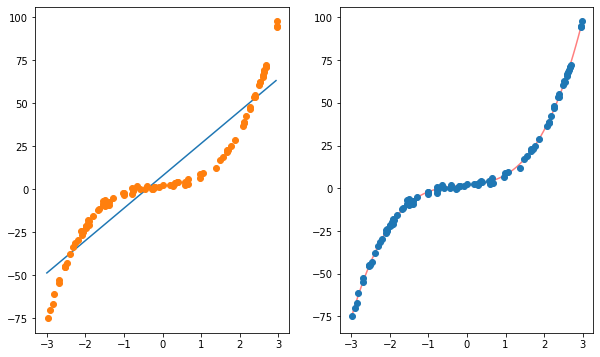

In [84]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

m = 100
# np.random.randint(6) # 0 ~ 5까지 랜덤한 숫자 1개
# np.random.rand(3,2) # 0 ~ 1 의 균일분포 표준정규분포 난수 matrix array(m,n) 생성
# np.random.randn(3,2) # 평균 0, 분산 1 가우시안 표준정규분포 난수 matrix array(m,n) 생성 
X = 6*np.random.rand(m,1) - 3
y = 3 * X**3  + X**2 + 2*X + 2 + np.random.randn(m,1)  # 3차항, 노이즈 포함

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

line = np.linspace(-3,3,100, endpoint=False).reshape(-1,1)
fig, axs = plt.subplots(1,2, figsize = (10,6))

axs[0].plot(line, model.predict(line))
axs[0].plot(X[:,0], y, 'o')


from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 3, include_bias = False)
X_poly = poly.fit_transform(X)
line_poly = poly.transform(line)


model = LinearRegression()
model.fit(X_poly, y)
line_poly_pred = model.predict(line_poly)

axs[1].plot(line, line_poly_pred, c = 'r', alpha = 0.5 )
axs[1].plot(X[:,0], y, 'o')

print('절편 : ' , model.intercept_)
print('회귀계수 : ' , model.coef_)

In [1]:
import pandas as pd
df = pd.read_csv('data/student_data.csv')

## 3. ANOVA분석 (9점)
### 변수 3개(하나는 범주형 변수/ 나머지 두 개는 수치형 연속변수)
### 이원분산분석을 수행하고 통계표를 작성하시오.
### 기출 : 생존과 요금, 나이에 대해 이원분산분석을 수행하라 
### 예제 : AveragePrice에 대해 type, region을 바탕으로 이원분산분석을 수행하라

In [92]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
# 1. 독립변수, 종속변수 Series로 변경
df = pd.read_csv('data/avocado.csv')
df = df[ (df['region']=='Orlando') | (df['region']=='Boston' )| (df['region']=='Chicago') ].reset_index(drop=True)
s_average = df['AveragePrice']
s_type = df['type']
s_region = df['region']

# 2. 모델 적합
formula = 'AveragePrice ~ C(type)*C(region)'
model = ols(formula, df).fit()
aov_table = anova_lm(model, type = 2)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(type),1.0,56.111007,56.111007,828.218296,1.989417e-133
C(region),2.0,0.432136,0.216068,3.189242,4.161918e-02
C(type):C(region),2.0,1.878817,0.939409,13.866003,1.146622e-06
Residual,1008.0,68.291047,0.067749,NaN,NaN


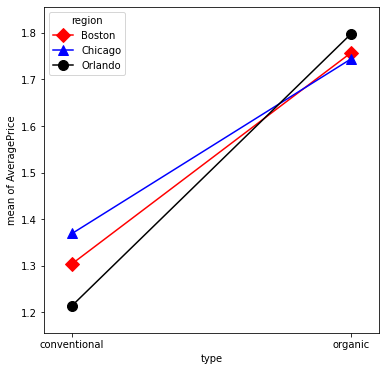

In [96]:
# 3. 상호작용 그래프
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt

fig, axs = plt.subplots(figsize = (6,6))
fig = interaction_plot(s_type, s_region, s_average, colors = ['red', 'blue', 'black'], markers = ['D', '^', 'o'], ms = 10, ax = axs)

#### 분산분석은 종속변수(반응변수)에 대해 두 개의 범주형 변수 A, B의 영향을 알아보기 위해 사용되는 검증 방법이다.
#### 가설은 아래와 같이 세울 수 있다.

#### 상호작용효과 검정에 대한 가설
##### > 귀무가설 : region과 avocado type 간에는 상호작용 효과가 없다.
##### > 대립가설 : region과 avocado type 간에는 상호작용 효과가 있다. 즉 region이 average price 미치는 영향은 type 수준에 따라 달라진다.

#### 주효과 검정에 대한 가설
#####  > 귀무가설 : region 종류에 따른 average price 차이는 존재하지 않는다.
#####  > 대립가설 : region 종류에 따른 average price 차이는 존재한다.

#####  > 귀무가설 : type 종류에 따른 average price 차이는 존재하지 않는다.
#####  > 대립가설 : type 종류에 따른 average price 차이는 존재한다.

#### 상호작용에 대한 검정 결과는 C(type):C(region) 행의 p-value 값을 보고 판단할 수 있다.
#### 유의수준 0.05 하에서 귀무가설을 기각할 수 있으며 유의수준 0.05 하에서 상호작용효과가 있다고 할 수 있다.
#### 또한 주효과 검정도 모두 유의수준 0.05하에서 유의하므로 각 변수의 종류에 따른 average price의 차이가 있다고 할 수 있다.


#### 더 직관적으로 판단하기위해 상호작용 그래프로 해당 모델을 표현하였다.
#### 통계표에서 보았던 상호작용 효과와 각 변수별 차이가 확실히 나타남을 알 수 있다.
#### 특히 orlando에서는 다른 지역보다 conventional 대비 orgainc의 선호도가 높음을 알 수 있다.
